# Data Pre_processing


In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("data/bank-full.csv", sep=";", quotechar='"', engine="python")

### Data Exploration

In [3]:
print(f"Dataset shape: {df.shape}")
df.info()
df.describe(include='all')

Dataset shape: (45211, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [4]:
print("\nMissing values:")
print(df.isnull().sum())

print("\nY rate:")
print(df['y'].value_counts(normalize=True))

print("\nStatistical summary:")
print(df.describe())


Missing values:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Y rate:
y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

Statistical summary:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.0

Xử lý Duration

In [5]:
if 'duration' in df.columns:
    df = df.drop(columns=['duration'])

### Features and label split

In [6]:
X = df.drop(columns=['y'], axis=1)
Y = df['y']

In [7]:
Y = Y.map({'yes': 1, 'no': 0})
print(f"Features shape: {X.shape}")
print(f"Labels shape: {Y.shape}")

Features shape: (45211, 15)
Labels shape: (45211,)


### Split Train and Test sets

In [8]:
ration = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=ration, random_state=42, stratify=Y)
print(f"Training set shape: {X_train.shape}, {Y_train.shape}")

Training set shape: (36168, 15), (36168,)


### Encoding the categorical features

In [9]:
def encode_categories(X_train, X_test):
    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()
    for X in (X_train_encoded, X_test_encoded):
        X["pdays_is_999"] = (X["pdays"] == 999).astype(int)
    # Binary encoding for default, housing, loan
    cots = ["default", "housing", "loan"]
    encode = LabelEncoder()
    for cot in cots: 
        X_train_encoded[cot] = encode.fit_transform(X_train_encoded[cot])
        X_test_encoded[cot] = encode.transform(X_test_encoded[cot])
    #Liệt kê các cột category (nominal) để One-Hot
    cat_cols = ["job", "marital", "education", "contact", "month", "poutcome"]
    encoders = {}
    encoded_train_dfs = []
    encoded_test_dfs = []

    for col in cat_cols:
        ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
        tr_enc = ohe.fit_transform(X_train_encoded[[col]])
        te_enc = ohe.transform(X_test_encoded[[col]])

        feat_names = ohe.get_feature_names_out([col])

        tr_df = pd.DataFrame(tr_enc, columns=feat_names, index=X_train_encoded.index)
        te_df = pd.DataFrame(te_enc, columns=feat_names, index=X_test_encoded.index)

        encoded_train_dfs.append(tr_df)
        encoded_test_dfs.append(te_df)

        encoders[col] = ohe  

    
    X_train_encoded = X_train_encoded.drop(columns=cat_cols)
    X_test_encoded = X_test_encoded.drop(columns=cat_cols)

    if encoded_train_dfs:
        X_train_encoded = pd.concat([X_train_encoded] + encoded_train_dfs, axis=1)
        X_test_encoded = pd.concat([X_test_encoded] + encoded_test_dfs, axis=1)

    return X_train_encoded, X_test_encoded

In [10]:
X_train_enc, X_test_enc = encode_categories(X_train, X_test)
print(f"Features after encoding: {list(X_train_enc.columns)}")
print(f"Training set shape after encoding: {X_train_enc.shape}")

Features after encoding: ['age', 'default', 'balance', 'housing', 'loan', 'day', 'campaign', 'pdays', 'previous', 'pdays_is_999', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']
Training set shape after encoding: (36168, 42)


### Features Scaling 

In [11]:
def feature_scaling(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(
        scaler.fit_transform(X_train),
        columns=X_train.columns,
        index=X_train.index
    )
    
    X_test_scaled = pd.DataFrame(
        scaler.transform(X_test),
        columns=X_test.columns,
        index=X_test.index
    )
    return X_train_scaled, X_test_scaled, scaler

In [12]:
X_train_final, X_test_final, scaler = feature_scaling(X_train_enc, X_test_enc)
print(f"Final training set shape: {X_train_final.shape}")
print(f"Final test set shape: {X_test_final.shape}")

Final training set shape: (36168, 42)
Final test set shape: (9043, 42)


### Summary 


In [13]:
print(f"\nSample of final preprocessed training data:")
print(X_train_final.head())

print(f"\nCorresponding labels:")
print(Y_train.head().tolist())


Sample of final preprocessed training data:
            age   default   balance   housing      loan       day  campaign  \
24001 -0.460434 -0.134961 -0.164410 -1.123601 -0.437608  1.582124 -0.246104   
43409 -1.589641 -0.134961  0.899627 -1.123601 -0.437608 -1.298384  0.398202   
20669  0.292371 -0.134961 -0.365486  0.889995 -0.437608 -0.458236  0.398202   
18810  0.668773 -0.134961 -0.445003 -1.123601 -0.437608  1.822166  2.653271   
23130 -0.272233 -0.134961 -0.361249 -1.123601 -0.437608  1.222060  2.331118   

          pdays  previous  pdays_is_999  ...  month_jul  month_jun  month_mar  \
24001 -0.410910 -0.241509           0.0  ...  -0.425164   -0.36427  -0.104541   
43409  1.446096  2.664584           0.0  ...  -0.425164   -0.36427  -0.104541   
20669 -0.410910 -0.241509           0.0  ...  -0.425164   -0.36427  -0.104541   
18810 -0.410910 -0.241509           0.0  ...   2.352033   -0.36427  -0.104541   
23130 -0.410910 -0.241509           0.0  ...  -0.425164   -0.36427  -0.1045

# Random Forest

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_final, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train_final, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test_final, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.895


Cắt tỉa độ sâu của cây và kiểm tra độ chính xác

In [16]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train_final, Y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train_final, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test_final, Y_test)))

Accuracy on training set: 0.883
Accuracy on test set: 0.883


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42, class_weight='balanced') 

param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [10, 20, None],       
    'min_samples_leaf': [1, 2, 4]      
}

grid_search = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           scoring='f1')

grid_search.fit(X_train_final, Y_train)


best_rf = grid_search.best_estimator_
#print(f"Siêu tham số tốt nhất: {grid_search.best_params_}")

Y_pred_final = best_rf.predict(X_test_final)
final_accuracy = accuracy_score(Y_test, Y_pred_final)

print(f"Độ chính xác cuối cùng trên tập test: {final_accuracy * 100:.2f}%")



Độ chính xác cuối cùng trên tập test: 86.48%


In [18]:
Y_pred_final.shape

(9043,)

In [19]:
score_rf = round(accuracy_score(Y_pred_final, Y_test) * 100, 2)
print("The accurracy score achieved using Decision Tree is: "+str(score_rf) +"%" )

The accurracy score achieved using Decision Tree is: 86.48%


# Confusion matrix of Random Forest

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [21]:
matrix = confusion_matrix(Y_test, Y_pred_final)

<Axes: >

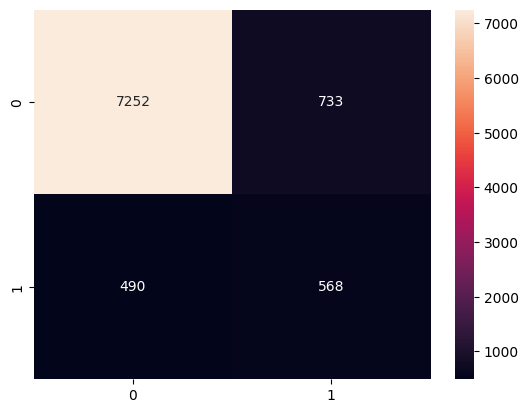

In [22]:
sns.heatmap(matrix, annot = True, fmt = "d")

# Precision score


In [23]:
from sklearn.metrics import precision_score

In [24]:
precision = precision_score(Y_test, Y_pred_final)

In [25]:
print("Precision: ", precision)

Precision:  0.43658724058416604


# Recall


In [26]:
from sklearn.metrics import recall_score

In [27]:
recall = recall_score(Y_test, Y_pred_final)

In [28]:
print("Recall: ", recall)

Recall:  0.5368620037807184


# F-score

In [29]:
print((2*precision*recall)/(precision+recall))

0.4815599830436626


cm using bad style


In [30]:
CM = pd.crosstab(Y_test,Y_pred_final)
CM

col_0,0,1
y,,
0,7252,733
1,490,568


In [31]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

# False negative rate of the model

In [32]:
fnr=FN*100/(FN+TP)
print(fnr)

46.31379962192817
